In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import locale 
from math import radians, sin, cos, sqrt, atan2
import csv

In [3]:
# READ IN CSV
df = pd.read_csv("Resources/NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [4]:
#check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [5]:
 #Check any duplicate record

df.duplicated().sum()

214

In [6]:
# Drop duplicate records

df.drop_duplicates(inplace=True)

In [7]:
# check types of homes in data set
df.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale', 'For sale',
       'Contingent', 'Land for sale', 'Foreclosure', 'Pending',
       'Coming Soon', 'Mobile house for sale', 'Condop for sale'],
      dtype=object)

In [8]:
# remove non specific types
df = df[df['TYPE'].isin(['Coming Soon', 'Contingent', 'For sale', 'Mobile house for sale', 'Condop for sale', 'Pending', 'Foreclosure', 'Land for sale'])==False]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4183 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4183 non-null   object 
 1   TYPE                         4183 non-null   object 
 2   PRICE                        4183 non-null   int64  
 3   BEDS                         4183 non-null   int64  
 4   BATH                         4183 non-null   float64
 5   PROPERTYSQFT                 4183 non-null   float64
 6   ADDRESS                      4183 non-null   object 
 7   STATE                        4183 non-null   object 
 8   MAIN_ADDRESS                 4183 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4183 non-null   object 
 10  LOCALITY                     4183 non-null   object 
 11  SUBLOCALITY                  4183 non-null   object 
 12  STREET_NAME                  4183 non-null   object 
 13  LONG_NAME              

In [10]:
# review types
df.TYPE.unique()

array(['Condo for sale', 'House for sale', 'Townhouse for sale',
       'Co-op for sale', 'Multi-family home for sale'], dtype=object)

In [11]:
# check value counts
df.TYPE.value_counts()

TYPE
Co-op for sale                1388
House for sale                 966
Condo for sale                 842
Multi-family home for sale     699
Townhouse for sale             288
Name: count, dtype: int64

In [14]:
# find the avg price of home type
regions = df.groupby('TYPE').mean('PRICE')
regions.head()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
TYPE,,,,,,
Co-op for sale,1.113426e+06,1.984870,1.438754,1658.496424,40.747603,-73.920662
Condo for sale,2.615780e+06,2.327791,2.002798,1571.731184,40.724426,-73.954237
House for sale,3.786544e+06,3.733954,2.532248,2254.455492,40.678153,-73.946532
Multi-family home for sale,1.666781e+06,6.261803,3.936427,3210.209600,40.700932,-73.927708
Townhouse for sale,6.406234e+06,5.020833,3.874356,3887.512776,40.718419,-73.971435


In [15]:
# sort values
avg_price = regions.sort_values(by=['PRICE'], ascending=False)

In [16]:
regions.nunique()

PRICE           5
BEDS            5
BATH            5
PROPERTYSQFT    5
LATITUDE        5
LONGITUDE       5
dtype: int64

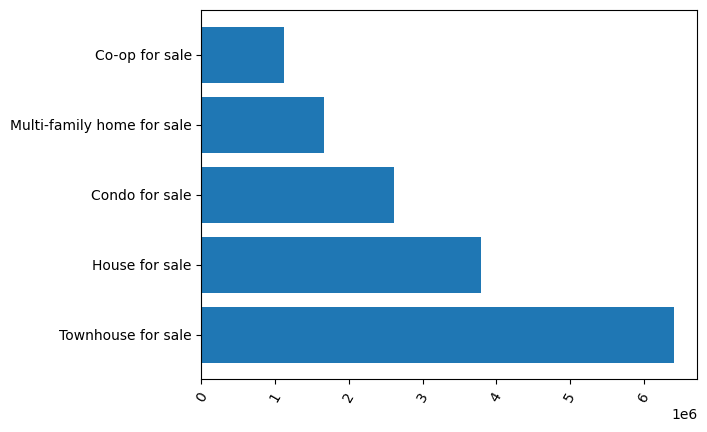

In [17]:
# what is the most expensive type of home in NY on avg
data = avg_price

plt.barh(data.index, data.PRICE)
plt.xticks(rotation=60)
plt.show()

In [18]:
# Function to calculate distance between two points
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)
    
    # Radius of the Earth in miles
    R = 3958.8
    
    # Calculate the differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Apply the Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance


# Enter the latitude and longitude of the point you want to calculate the distance from
my_latitude = 40.730610
my_longitude = -73.935242

df['Distance'] = df.apply(lambda row: calculate_distance(row['LATITUDE'], row['LONGITUDE'], my_latitude, my_longitude), axis=1)


In [19]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2.950061
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,3.442019
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2.961863
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3.111680


In [20]:
#find the price by square foot
df['PRICE_BY_SQFT'] = df['PRICE']/df['PROPERTYSQFT']

In [21]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2.950061,225.000000
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991,3.442019,11114.277572
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470,129.032258
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2.961863,155.056180
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3.111680,3880.070547


In [22]:
df2 = df.loc[df["PRICE_BY_SQFT"] ==  2147483647]
df2

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT


In [23]:

df2 = df.loc[df["PRICE"] !=  2147483647]
df2.sort_values(by = 'PRICE_BY_SQFT', ascending = False)

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT
1075,Brokered by COMPASS,Co-op for sale,60000000,8,8.000000,2184.207862,960 5th Ave Unit 12,"Manhattan, NY 10075","960 5th Ave Unit 12Manhattan, NY 10075",New York,New York County,New York,Manhattan,960,"960 5th Ave #12, New York, NY 10075, USA",40.775642,-73.964247,3.462067,27469.913026
1453,Brokered by Corcoran East Side,Co-op for sale,48000000,5,2.373861,2184.207862,740 Park Ave # 4 & 5B,"New York, NY 10021","740 Park Ave # 4 & 5BNew York, NY 10021",New York,New York County,New York,Manhattan,740,"740 Park Ave #5, New York, NY 10021, USA",40.770752,-73.964528,3.168978,21975.930421
3388,Brokered by Sotheby's International Realty - E...,Co-op for sale,45000000,5,2.373861,2184.207862,4 E 66th St Fl 7,"New York, NY 10065","4 E 66th St Fl 7New York, NY 10065",New York,New York County,New York,Manhattan,4,"4 E 66th St Fl 7, New York, NY 10065, USA",40.768301,-73.969734,3.168836,20602.434770
3571,Brokered by Sotheby's International Realty - E...,Co-op for sale,44500000,5,6.000000,2184.207862,2 E 67th St Fl 9,"New York, NY 10065","2 E 67th St Fl 9New York, NY 10065",New York,New York County,New York,Manhattan,2,"2 E 67th St Fl 9, New York, NY 10065, USA",40.768973,-73.969136,3.189594,20373.518828
1258,Brokered by Corcoran West Side,Multi-family home for sale,34000000,3,8.000000,2184.207862,217 W 21st St,"New York, NY 10011","217 W 21st StNew York, NY 10011",United States,New York,New York County,New York,West 21st Street,"217 W 21st St, New York, NY 10011, USA",40.743390,-73.997378,3.370735,15566.284048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1210,"Brokered by LandSeAir Real Estate Group, Inc -...",Co-op for sale,119888,1,1.000000,2184.207862,112-50 Northern Blvd Unit 5E,"Corona, NY 11368","112-50 Northern Blvd Unit 5ECorona, NY 11368",New York,Queens County,Queens,Corona,112-50,"112-50 Northern Blvd #5e, Corona, NY 11368, USA",40.758223,-73.855922,4.569583,54.888549
3615,Brokered by CENTURY 21 Milestone Realty,Co-op for sale,119000,3,1.000000,2184.207862,89-00 170 St Unit 11N,"Jamaica, NY 11432","89-00 170 St Unit 11NJamaica, NY 11432",New York,Queens County,Queens,Jamaica,8900,"8900 170th St Apt 11l, Jamaica, NY 11432, USA",40.709570,-73.791130,7.685429,54.481994
723,NoBroker,Co-op for sale,115000,3,1.000000,2184.207862,87-15 165th St Unit 6C,"Jamaica, NY 11432","87-15 165th St Unit 6CJamaica, NY 11432",New York,Queens County,Queens,Jamaica,87-15,"87-15 165th St #6c, Jamaica, NY 11432, USA",40.710451,-73.798206,7.309997,52.650667
759,Brokered by Keller Williams City Views,Co-op for sale,109000,1,1.000000,2184.207862,335 E 209th St Apt 4,"Bronx, NY 10467","335 E 209th St Apt 4Bronx, NY 10467",New York,Bronx County,The Bronx,Norwood,335,"335 E 209th St Apt 4, Bronx, NY 10467, USA",40.876871,-73.874264,10.597078,49.903675


In [24]:
#check for outliers
df_one = df['PRICE_BY_SQFT'].astype(float).quantile(0.99)
df = df.loc[df['PRICE_BY_SQFT'] <= df_one]
df.head()
x_label = "Years"
y_label = "Adjusted Earnings (US$ MM)"
fig_name = "Scatter without outliers"
# linear_regression_plot(outliers_df.Year.astype(float), outliers_df.Adjusted_Earnings.astype(float), x_label, y_label,(2015,10), fig_name)
df.count()

BROKERTITLE                    4141
TYPE                           4141
PRICE                          4141
BEDS                           4141
BATH                           4141
PROPERTYSQFT                   4141
ADDRESS                        4141
STATE                          4141
MAIN_ADDRESS                   4141
ADMINISTRATIVE_AREA_LEVEL_2    4141
LOCALITY                       4141
SUBLOCALITY                    4141
STREET_NAME                    4141
LONG_NAME                      4141
FORMATTED_ADDRESS              4141
LATITUDE                       4141
LONGITUDE                      4141
Distance                       4141
PRICE_BY_SQFT                  4141
dtype: int64

In [25]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2.950061,225.000000
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470,129.032258
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2.961863,155.056180
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3.111680,3880.070547
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,4.076335,172.327672


In [26]:
house_type = 'House for sale'
house_type_df = df.loc[df["TYPE"] ==  house_type]
house_type_df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT
2,Brokered by Sowae Corp,House for sale,260000,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470,129.032258
5,Brokered by Sowae Corp,House for sale,690000,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,4.076335,172.327672
7,Brokered by Connie Profaci Realty,House for sale,16800000,8,16.0,33000.0,177 Benedict Rd,"Staten Island, NY 10304","177 Benedict RdStaten Island, NY 10304",United States,New York,Richmond County,Staten Island,Benedict Road,"177 Benedict Rd, Staten Island, NY 10304, USA",40.595002,-74.106424,12.972564,509.090909
20,Brokered by Radiant Estates LLC,House for sale,639999,3,2.0,1260.0,27 Clove Way,"Staten Island, NY 10301","27 Clove WayStaten Island, NY 10301",United States,New York,Richmond County,Staten Island,Clove Way,"27 Clove Way, Staten Island, NY 10301, USA",40.620740,-74.111436,11.953013,507.935714
24,Brokered by Elizabeth Marra,House for sale,750000,2,2.0,1330.0,280 Loretto St,"Staten Island, NY 10307","280 Loretto StStaten Island, NY 10307",United States,New York,Richmond County,Staten Island,Loretto Street,"280 Loretto St, Staten Island, NY 10307, USA",40.503979,-74.239655,22.363029,563.909774


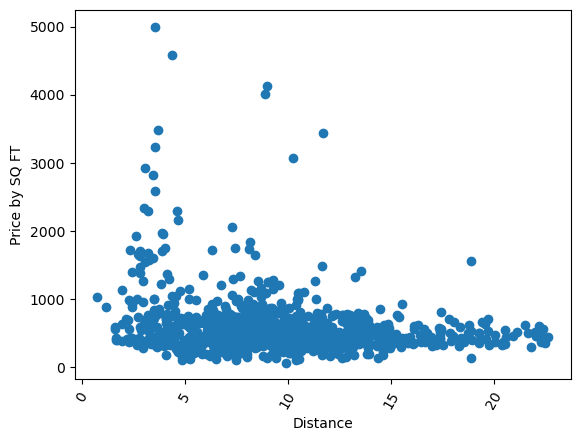

In [31]:
#show distance from downtown based on house type and price by square foot
plt.scatter(house_type_df.Distance, house_type_df.PRICE_BY_SQFT)
plt.xticks(rotation=60)
plt.xlabel("Distance")
plt.ylabel("Price by SQ FT")
plt.figure
plt.show()

In [27]:
from shapely.geometry import Point, Polygon

# Define the polygons for each borough
borough_polygons = {
    'Manhattan': Polygon([(40.693943, -74.022859), (40.788547, -73.910659), (40.849775, -73.933165), (40.872144, -73.909683), (40.787045, -73.935865), (40.693943, -74.022859)]),
    'Bronx': Polygon([(40.785531, -73.886157), (40.917577, -73.765858), (40.885910, -73.765858), (40.785531, -73.886157)]),
    'Brooklyn': Polygon([(40.683941, -74.047221), (40.739446, -73.833365), (40.618717, -73.867775), (40.618717, -74.047221), (40.683941, -74.047221)]),
    'Queens': Polygon([(40.541722, -73.933165), (40.800037, -73.700272), (40.800037, -73.700272), (40.541722, -73.933165)]),
    'Staten Island': Polygon([(40.507054, -74.255641), (40.642216, -74.055123), (40.564657, -74.055123), (40.507054, -74.255641)])
}

# Function to get borough from latitude and longitude
def get_borough(lat, lon):
    point = Point(lat, lon)
    for borough, polygon in borough_polygons.items():
        if polygon.contains(point):
            return borough
    return None

# Apply the function to your DataFrame
df['Borough'] = df.apply(lambda row: get_borough(row['LATITUDE'], row['LONGITUDE']), axis=1)






In [28]:
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT,Borough
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2.950061,225.000000,None
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470,129.032258,Staten Island
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2.961863,155.056180,None
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3.111680,3880.070547,None
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,4.076335,172.327672,Brooklyn


In [29]:
df.PRICE.describe()

count    4.141000e+03
mean     1.712347e+06
std      3.406446e+06
min      4.950000e+04
25%      4.950000e+05
50%      8.250000e+05
75%      1.495000e+06
max      6.500000e+07
Name: PRICE, dtype: float64

In [30]:
# Extract the first word from the 'Phrase' column
df['House_Type'] = df['TYPE'].str.split().str[0]


# Print the updated DataFrame
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,...,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE,Distance,PRICE_BY_SQFT,Borough,House_Type
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,...,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483,2.950061,225.000000,None,Condo
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,...,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109,18.901470,129.032258,Staten Island,House
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,...,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613,2.961863,155.056180,None,Condo
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,...,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856,3.111680,3880.070547,None,Townhouse
5,Brokered by Sowae Corp,House for sale,690000,5,2.000000,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,...,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725,4.076335,172.327672,Brooklyn,House


In [31]:
df.House_Type.unique()

array(['Condo', 'House', 'Townhouse', 'Co-op', 'Multi-family'],
      dtype=object)

In [113]:
df.to_csv('NY-House-Dataset_CLEANNNN.csv', index=False)